# Step 1. Reading in Data

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import scipy.stats as st

In [4]:
datasets = ['megaline_calls.csv', 'megaline_internet.csv', 'megaline_messages.csv', 
            'megaline_tariffs.csv', 'megaline_users.csv']

In [5]:
calls = pd.read_csv(datasets[0])

In [6]:
internet = pd.read_csv(datasets[1])

In [7]:
messages = pd.read_csv(datasets[2])

In [8]:
tariffs = pd.read_csv(datasets[3])

In [9]:
users = pd.read_csv(datasets[4])

In [10]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [11]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [12]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [13]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,tariff_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [14]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [15]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
calls['duration'].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [17]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
internet['mb_used'].describe()

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

In [19]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [20]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [21]:
users['age'].describe()

count    500.000000
mean      45.486000
std       16.972269
min       18.000000
25%       30.000000
50%       46.000000
75%       61.000000
max       75.000000
Name: age, dtype: float64

# Notes

Here we are simply reading in the data and exploring some of the basic information about these tables. From the looks of it, we will likely need to keep them separate for some of our analysis, so we'll look at potentially merging/joining them later on. Initially though, we note "tariffs" simply outlines the plans. Users reveals we have 500 users in total. And, internet, calls, messages tables all refer to diferent events, which fuels my choice to keep them separate initially. For now, we'll want to clean up each of the five datasets separately.

# Step 2. Preprocessing Data

In [22]:
internet.drop_duplicates(inplace=True)

In [23]:
calls.drop_duplicates(inplace=True)

In [24]:
messages.drop_duplicates(inplace=True)

In [25]:
len(internet)

104825

In [26]:
len(calls)

137735

In [27]:
len(messages)

76051

In [28]:
users.set_index(users['user_id'],inplace=True)

In [29]:
users.drop('user_id', axis=1, inplace=True)

In [30]:
def group_by_month(date):
    if date.startswith('2018-12'):
        return 'Dec'
    if date.startswith('2018-11'):
        return 'Nov'
    if date.startswith('2018-10'):
        return 'Oct'
    if date.startswith('2018-09'):
        return 'Sep'
    if date.startswith('2018-08'):
        return 'Aug'
    if date.startswith('2018-07'):
        return 'Jul'
    if date.startswith('2018-06'):
        return 'Jun'
    if date.startswith('2018-05'):
        return 'May'
    if date.startswith('2018-04'):
        return 'Apr'
    if date.startswith('2018-03'):
        return 'Mar'
    if date.startswith('2018-02'):
        return 'Feb'
    if date.startswith('2018-01'):
        return 'Jan'

In [31]:
calls['date'] = calls['call_date']

In [32]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [33]:
calls.set_index(calls["call_date"],inplace=True)

In [34]:
calls.drop('call_date', axis=1, inplace=True)

In [35]:
internet['date'] = internet['session_date']

In [36]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

In [37]:
internet.set_index(internet["session_date"],inplace=True)

In [38]:
internet.drop('session_date', axis=1, inplace=True)

In [39]:
messages['date'] = messages['message_date']

In [40]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

In [41]:
messages.set_index(messages["message_date"],inplace=True)

In [42]:
messages.drop('message_date', axis=1, inplace=True)

In [43]:
messages['month'] = messages['date'].apply(group_by_month)

In [44]:
internet['month'] = internet['date'].apply(group_by_month)

In [45]:
calls['month'] = calls['date'].apply(group_by_month)

In [46]:
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [47]:
users['churn_date'] = pd.to_datetime(users['churn_date'])

Text(0, 0.5, 'Frequency')

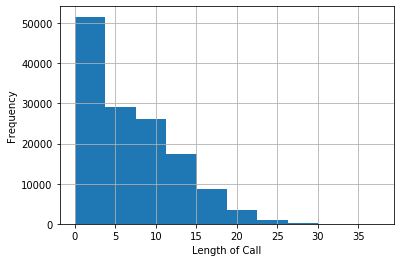

In [48]:
calls['duration'].hist()
plt.xlabel('Length of Call')
plt.ylabel('Frequency')

In [49]:
import math 

In [50]:
calls['duration'] = calls['duration'].apply(math.ceil)

In [51]:
internet['mb_used'] = internet['mb_used'].apply(math.ceil)

In [52]:
good_calls = calls[calls['duration'] > 0]
len(good_calls)

110901

In [53]:
internet.head()

,id,user_id,mb_used,date,month
session_date,,,,,
2018-12-29,1000_13,1000,90,2018-12-29,Dec
2018-12-31,1000_204,1000,0,2018-12-31,Dec
2018-12-28,1000_379,1000,661,2018-12-28,Dec
2018-12-26,1000_413,1000,271,2018-12-26,Dec
2018-12-27,1000_442,1000,881,2018-12-27,Dec


In [54]:
good_calls.head()

,id,user_id,duration,date,month
call_date,,,,,
2018-12-27,1000_93,1000,9,2018-12-27,Dec
2018-12-27,1000_145,1000,14,2018-12-27,Dec
2018-12-27,1000_247,1000,15,2018-12-27,Dec
2018-12-28,1000_309,1000,6,2018-12-28,Dec
2018-12-30,1000_380,1000,5,2018-12-30,Dec


In [55]:
message_data = pd.pivot_table(messages, index=['user_id', 'month'], values='date', aggfunc='count')
message_data.columns = ['total_messages']

In [56]:
message_data.head()

total_messages
user_id month                
1000    Dec                11
1001    Aug                30
        Dec                44
        Nov                36
        Oct                53

In [57]:
call_data = pd.pivot_table(good_calls, index=['user_id', 'month'], values='duration', 
               aggfunc='sum')
call_data.columns = ['total_call_time']

In [58]:
call_data = call_data.reset_index('month')

In [59]:
call_data.head()

,month,total_call_time
user_id,,
1000,Dec,124
1001,Aug,182
1001,Dec,412
1001,Nov,426
1001,Oct,393


In [60]:
internet_data = pd.pivot_table(internet, index=['user_id', 'month'], values='mb_used',
                              aggfunc=['mean', 'median', 'sum'])
internet_data.columns = ['mean_mb_used', 'median_mb_used', 'total_mb_used']

In [61]:
internet_data.head()

mean_mb_used  median_mb_used  total_mb_used
user_id month                                             
1000    Dec      380.600000           271.0           1903
1001    Aug      277.160000           211.0           6929
        Dec      323.300000           275.5          19398
        Nov      363.215686           403.0          18524
        Oct      399.214286           445.0          22356

# Notes

In this section, I first wanted to make sure there were no duplicate data points. From there, knowing there are no nulls in the data, I went ahead and adjusted date columns to follow the more managable datetime data type. Next, I eliminated call times that were 0, since these likely represent mistakes in the data. 

From here, I created a pivot table for each category: calls, messages, internet. I left in some extra columns here just in case we want to explore further trends. Most importantly, I took the total mb_used from internet, the total messages sent from messages, and the total call time from calls. 

With these three pivot tables, I can continue to combine them and calculate profits for each user. 

# Step 2.1 - Calculating Profit

In [62]:
temp = users.join(call_data, on='user_id')

In [63]:
temp.reset_index('user_id', inplace=True)

In [64]:
temp.set_index(['month', 'user_id'], inplace=True)

In [65]:
temp.head()

,,first_name,last_name,age,city,reg_date,tariff,churn_date,total_call_time
month,user_id,,,,,,,,
Dec,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,124.0
Aug,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,182.0
Dec,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,412.0
Nov,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,426.0
Oct,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,393.0


In [66]:
temp2 = temp.join(internet_data, on=['user_id', 'month'])

In [67]:
temp2.head()

,,first_name,last_name,age,city,reg_date,tariff,churn_date,total_call_time,mean_mb_used,median_mb_used,total_mb_used
month,user_id,,,,,,,,,,,
Dec,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,124.0,380.600000,271.0,1903.0
Aug,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,182.0,277.160000,211.0,6929.0
Dec,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,412.0,323.300000,275.5,19398.0
Nov,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,426.0,363.215686,403.0,18524.0
Oct,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,393.0,399.214286,445.0,22356.0


In [68]:
df = temp2.join(message_data, on=['user_id', 'month'])

In [69]:
df.head()

,,first_name,last_name,age,city,reg_date,tariff,churn_date,total_call_time,mean_mb_used,median_mb_used,total_mb_used,total_messages
month,user_id,,,,,,,,,,,,
Dec,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,124.0,380.600000,271.0,1903.0,11.0
Aug,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,182.0,277.160000,211.0,6929.0,30.0
Dec,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,412.0,323.300000,275.5,19398.0,44.0
Nov,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,426.0,363.215686,403.0,18524.0,36.0
Oct,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,393.0,399.214286,445.0,22356.0,53.0


In [70]:
calc = df.drop(['first_name', 'last_name', 'age', 'city', 'reg_date', 'churn_date', 'mean_mb_used', 
                'median_mb_used'], axis=1)

In [71]:
calc.head()

,,tariff,total_call_time,total_mb_used,total_messages
month,user_id,,,,
Dec,1000,ultimate,124.0,1903.0,11.0
Aug,1001,surf,182.0,6929.0,30.0
Dec,1001,surf,412.0,19398.0,44.0
Nov,1001,surf,426.0,18524.0,36.0
Oct,1001,surf,393.0,22356.0,53.0


In [72]:
def calc_plan_cost(row):
    if row == 'ultimate':
        return 70
    if row == 'surf': 
        return 20

In [73]:
calc['base_cost'] = calc['tariff'].apply(calc_plan_cost)

In [74]:
calc.head()

,,tariff,total_call_time,total_mb_used,total_messages,base_cost
month,user_id,,,,,
Dec,1000,ultimate,124.0,1903.0,11.0,70
Aug,1001,surf,182.0,6929.0,30.0,20
Dec,1001,surf,412.0,19398.0,44.0,20
Nov,1001,surf,426.0,18524.0,36.0,20
Oct,1001,surf,393.0,22356.0,53.0,20


In [75]:
def calc_call_cost(row):
    charges = 0
    if row['tariff'] == 'ultimate':
        call_limit = 3000
        min_charge = 0.01
    if row['tariff'] == 'surf':
        call_limit = 500
        min_charge = 0.03
    call_difference = call_limit - row['total_call_time']
    if call_difference < 0: 
        call_over = abs(call_difference)
        charges = call_over * min_charge
    return charges

In [76]:
def calc_data_cost(row):
    charges = 0
    if row['tariff'] == 'ultimate':
        data_limit = 30720
        data_charge = 7/1024
    if row['tariff'] == 'surf':
        data_limit = 15360
        data_charge = 10/1024
    data_difference = data_limit - row['total_mb_used']
    if data_difference < 0: 
        data_over = abs(data_difference)
        charges = data_over * data_charge
    return charges

In [77]:
def calc_message_cost(row):
    charges = 0
    if row['tariff'] == 'ultimate':
        sms_limit = 1000
        sms_charge = 0.01
    if row['tariff'] == 'surf':
        sms_limit = 50
        sms_charge = 0.03
    sms_difference = sms_limit - row['total_messages']
    if sms_difference < 0: 
        sms_over = abs(sms_difference)
        charges = sms_over * sms_charge
    return charges

In [78]:
calc['phone_cost'] = calc.apply(calc_call_cost, axis=1)

In [79]:
calc['data_cost'] = calc.apply(calc_data_cost, axis=1)

In [80]:
calc['message_cost'] = calc.apply(calc_message_cost, axis=1)

In [81]:
calc['total_revenue'] = calc['base_cost'] + calc['phone_cost'] + calc['message_cost'] + calc['data_cost']

In [82]:
calc.head()

,,tariff,total_call_time,total_mb_used,total_messages,base_cost,phone_cost,data_cost,message_cost,total_revenue
month,user_id,,,,,,,,,
Dec,1000,ultimate,124.0,1903.0,11.0,70,0.0,0.000000,0.00,70.000000
Aug,1001,surf,182.0,6929.0,30.0,20,0.0,0.000000,0.00,20.000000
Dec,1001,surf,412.0,19398.0,44.0,20,0.0,39.433594,0.00,59.433594
Nov,1001,surf,426.0,18524.0,36.0,20,0.0,30.898438,0.00,50.898438
Oct,1001,surf,393.0,22356.0,53.0,20,0.0,68.320312,0.09,88.410313


In [83]:
pivot = pd.pivot_table(calc, index='user_id', values='total_revenue', aggfunc='sum')

In [84]:
pivot['avg_revenue_per_month'] = pivot['total_revenue'] / 12

In [85]:
pivot.head()

,total_revenue,avg_revenue_per_month
user_id,,
1000,70.000000,5.833333
1001,238.742344,19.895195
1002,99.101562,8.258464
1003,152.465703,12.705475
1004,582.558594,48.546549


In [86]:
users2 = users.drop(['first_name', 'last_name', 'age', 'city', 'reg_date', 'churn_date'], axis=1)

In [87]:
pivot = pivot.merge(users2, on='user_id')

In [88]:
print(pivot.sort_values('total_revenue', ascending=False).head(10))

         total_revenue  avg_revenue_per_month    tariff
user_id                                                
1268       1765.645156             147.137096      surf
1240       1632.467578             136.038965      surf
1359       1567.145156             130.595430      surf
1292       1552.226562             129.352214      surf
1147       1540.562422             128.380202      surf
1374       1361.946406             113.495534      surf
1028       1211.615234             100.967936  ultimate
1328       1156.239687              96.353307      surf
1201       1104.406484              92.033874      surf
1251       1016.534453              84.711204      surf


In [89]:
total_yearly_revenue = sum(pivot['total_revenue'])

In [90]:
print(total_yearly_revenue)

140401.7002734375


# Notes

At this point, I defined some custom functions to calculate points of interest. Namely, we want to know how much each user pays for month. We now have that data easily accessible. Similarly, I decided to look at the total yearly revenue, as well as take a closer look at the biggest spenders over the course of the year. 

When breaking down the total revenue by each user over the year, we find out of our top 10 customers, 9 of them are on the surf plan. It appears so far that surf plans are the bigger money-maker. We'll be able to use some of this insight to better inform our data analysis. Now it's time to dig into the data some more.

# Step 3. Analyze the Data

In [91]:
plan_data = pd.pivot_table(calc, index='tariff', values=['total_messages', 'total_mb_used', 'total_call_time'], 
                                                         aggfunc=['mean', 'median', 'var', 'std'])

In [92]:
plan_data.head()

mean                                       median  \
         total_call_time total_mb_used total_messages total_call_time   
tariff                                                                  
surf          436.802461  16697.013080      39.980737           430.0   
ultimate      435.286517  17321.925562      46.534602           425.5   

                                                  var                \
         total_mb_used total_messages total_call_time total_mb_used   
tariff                                                                
surf           16952.0           32.0    52481.561083  5.950399e+07   
ultimate       16890.5           41.0    56387.085163  5.999959e+07   

                                    std                               
         total_messages total_call_time total_mb_used total_messages  
tariff                                                                
surf        1101.537768      229.088544   7713.883136      33.189423  
ultimate    1082.685976      237.459650   7745.940139      32.904194

In [93]:
plan_monthly = pd.pivot_table(calc, index=['month', 'tariff'], values=['total_messages', 'total_mb_used', 'total_call_time'], 
                                                         aggfunc=['mean', 'var', 'std'])

In [94]:
plan_monthly.columns = ['mean_call_len', 'mean_mb_used', 'mean_sms_sent', 'call_var', 'mb_var', 'sms_var',
                       'call_std', 'mb_std', 'sms_std']

In [95]:
plan_monthly

mean_call_len  mean_mb_used  mean_sms_sent      call_var  \
month tariff                                                               
Apr   surf         351.540000  12243.061224      24.166667  50866.743265   
      ultimate     336.857143  16140.476190      28.937500  34888.928571   
Aug   surf         417.849057  17214.576923      37.917355  52122.749224   
      ultimate     421.436620  17834.887324      47.929825  53645.506640   
Dec   surf         484.501608  18060.148387      48.113360  59882.373385   
      ultimate     465.261745  18342.630872      53.744000  60461.924270   
Feb   surf         297.000000  12192.888889      21.600000  52226.500000   
      ultimate     470.333333  17906.500000      27.800000  54345.066667   
Jan   surf         203.000000   4881.000000      21.000000  15842.000000   
      ultimate     193.500000   6926.250000      20.666667  16572.333333   
Jul   surf         453.733333  16946.252101      36.033333  59802.012325   
      ultimate     427.067797  16363.677966      41.212766  72563.374635   
Jun   surf         435.791667  15652.627660      33.708333  44094.061404   
      ultimate     387.444444  15938.244444      37.135135  37902.570707   
Mar   surf         330.000000  13361.043478      21.937500  35809.363636   
      ultimate     304.250000  18340.250000      34.714286  61984.931818   
May   surf         410.240000  14410.837838      33.870370  56938.779459   
      ultimate     406.241379  16643.758621      44.333333  43841.046798   
Nov   surf         432.494585  16428.305455      40.436364  48748.787108   
      ultimate     452.320000  17153.216000      48.118812  58322.606452   
Oct   surf         440.891775  17555.728070      41.945652  48699.905628   
      ultimate     455.028571  17801.123810      47.488636  52811.566484   
Sep   surf         420.732984  16547.673684      39.202703  44579.912538   
      ultimate     437.511628  16989.395349      45.901408  57070.464569   

                      mb_var      sms_var    call_std        mb_std    sms_std  
month tariff                                                                    
Apr   surf      5.734854e+07   534.028571  225.536567   7572.882161  23.109058  
      ultimate  8.859513e+07   512.862500  186.785783   9412.498689  22.646468  
Aug   surf      7.103085e+07  1031.659780  228.304072   8427.980282  32.119461  
      ultimate  6.054714e+07  1034.387845  231.614997   7781.204098  32.161901  
Dec   surf      6.416609e+07  1379.426122  244.708752   8010.374094  37.140626  
      ultimate  5.832627e+07  1380.175871  245.890065   7637.163721  37.150718  
Feb   surf      4.377810e+07   512.800000  228.531179   6616.502257  22.645088  
      ultimate  4.047629e+07   529.700000  233.120284   6362.098105  23.015212  
Jan   surf      1.827706e+07          NaN  125.865007   4275.167599        NaN  
      ultimate  1.642061e+07   310.333333  128.733575   4052.235052  17.616280  
Jul   surf      6.349874e+07   917.470787  244.544500   7968.609821  30.289780  
      ultimate  6.855162e+07   858.084181  269.375898   8279.590645  29.293074  
Jun   surf      4.566182e+07   948.970070  209.985860   6757.353113  30.805358  
      ultimate  6.722775e+07   801.731231  194.685826   8199.253159  28.314859  
Mar   surf      6.839062e+07   352.062500  189.233622   8269.861896  18.763329  
      ultimate  1.406093e+08   613.904762  248.967732  11857.880971  24.777102  
May   surf      5.837506e+07   877.548917  238.618481   7640.357153  29.623452  
      ultimate  5.689892e+07  1246.933333  209.382537   7543.137575  35.311943  
Nov   surf      5.183890e+07  1011.370361  220.791275   7199.923626  31.802050  
      ultimate  5.620321e+07  1089.805743  241.500738   7496.880011  33.012206  
Oct   surf      5.780164e+07  1248.095391  220.680551   7602.739275  35.328394  
      ultimate  5.462604e+07  1088.160789  229.807673   7390.943405  32.987282  
Sep   surf      4.834398e+07   947.822578  211.139557   6952.983478  30.786727  
      ultimate

In [96]:
surf = df[df['tariff'] == 'surf']

In [97]:
ultimate = df[df['tariff'] == 'ultimate']

Text(0, 0.5, 'Frequency')

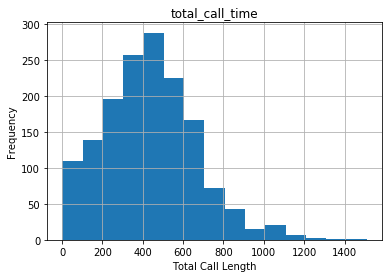

In [98]:
surf.hist(column='total_call_time', bins=15)
plt.xlabel('Total Call Length')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

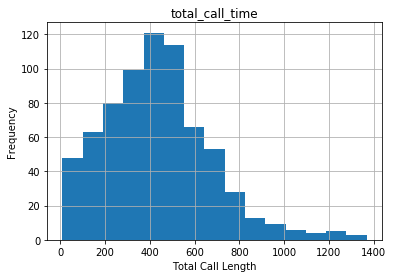

In [99]:
ultimate.hist(column='total_call_time', bins=15)
plt.xlabel('Total Call Length')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

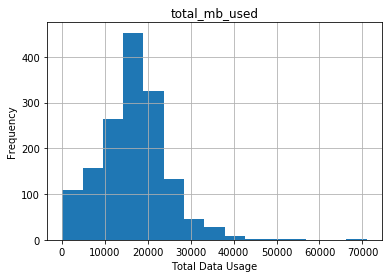

In [100]:
surf.hist(column='total_mb_used', bins=15)
plt.xlabel('Total Data Usage')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

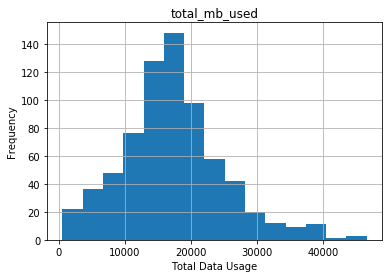

In [101]:
ultimate.hist(column='total_mb_used', bins=15)
plt.xlabel('Total Data Usage')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

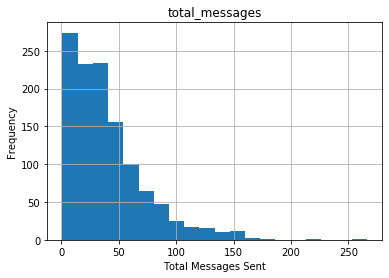

In [102]:
surf.hist(column='total_messages', bins=20)
plt.xlabel('Total Messages Sent')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

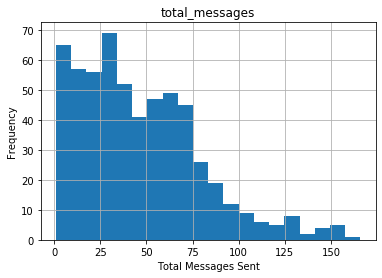

In [103]:
ultimate.hist(column='total_messages', bins=20)
plt.xlabel('Total Messages Sent')
plt.ylabel('Frequency')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7805A7648>,
      dtype=object)

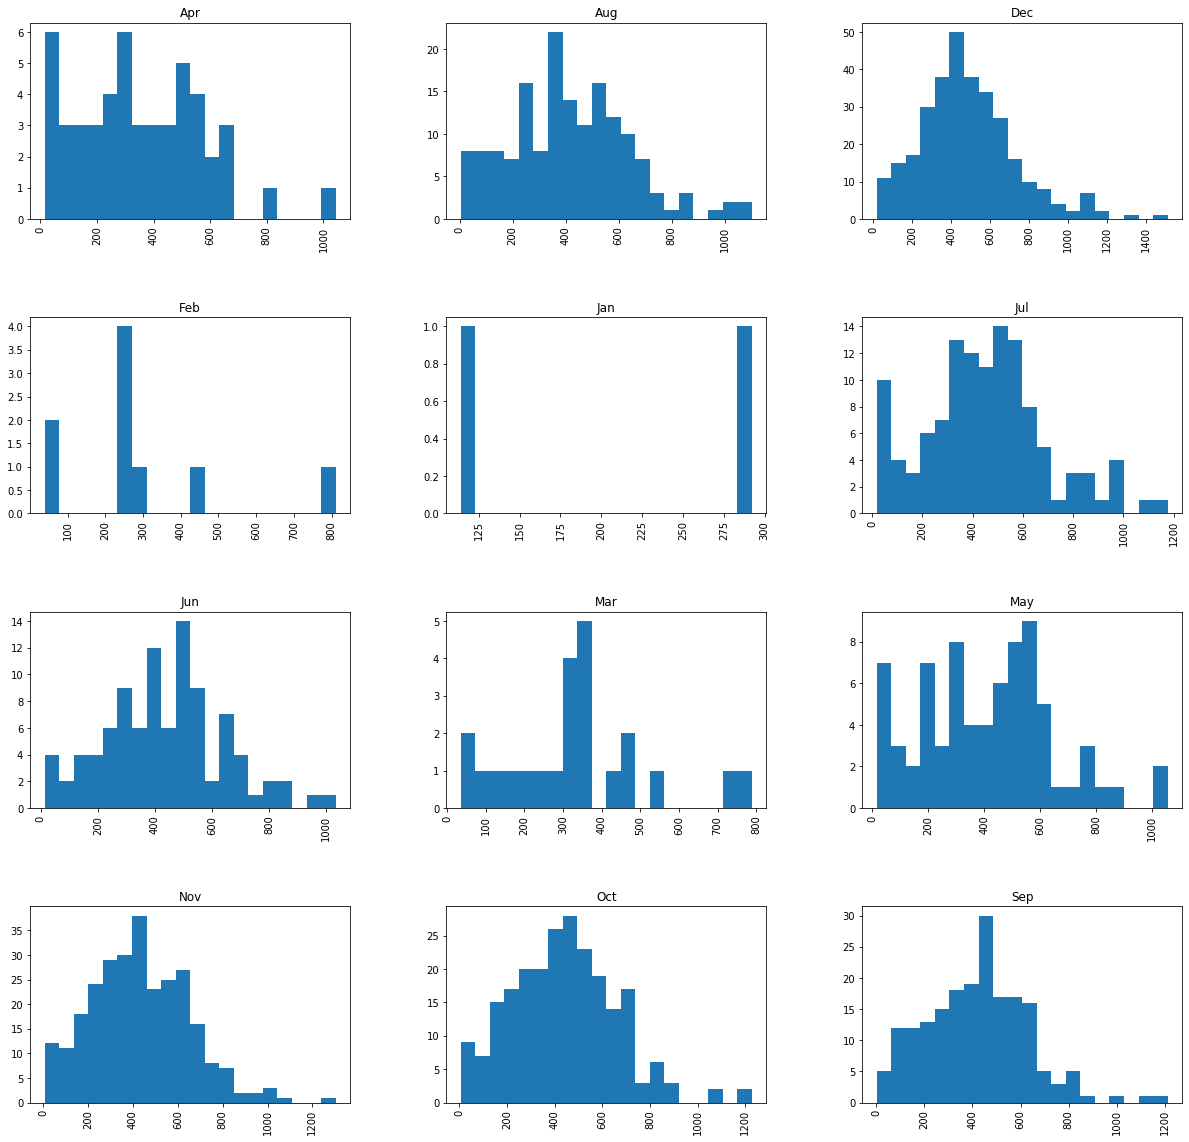

In [104]:
surf.hist(column='total_call_time', by='month', bins=20, figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F78065A348>,
      dtype=object)

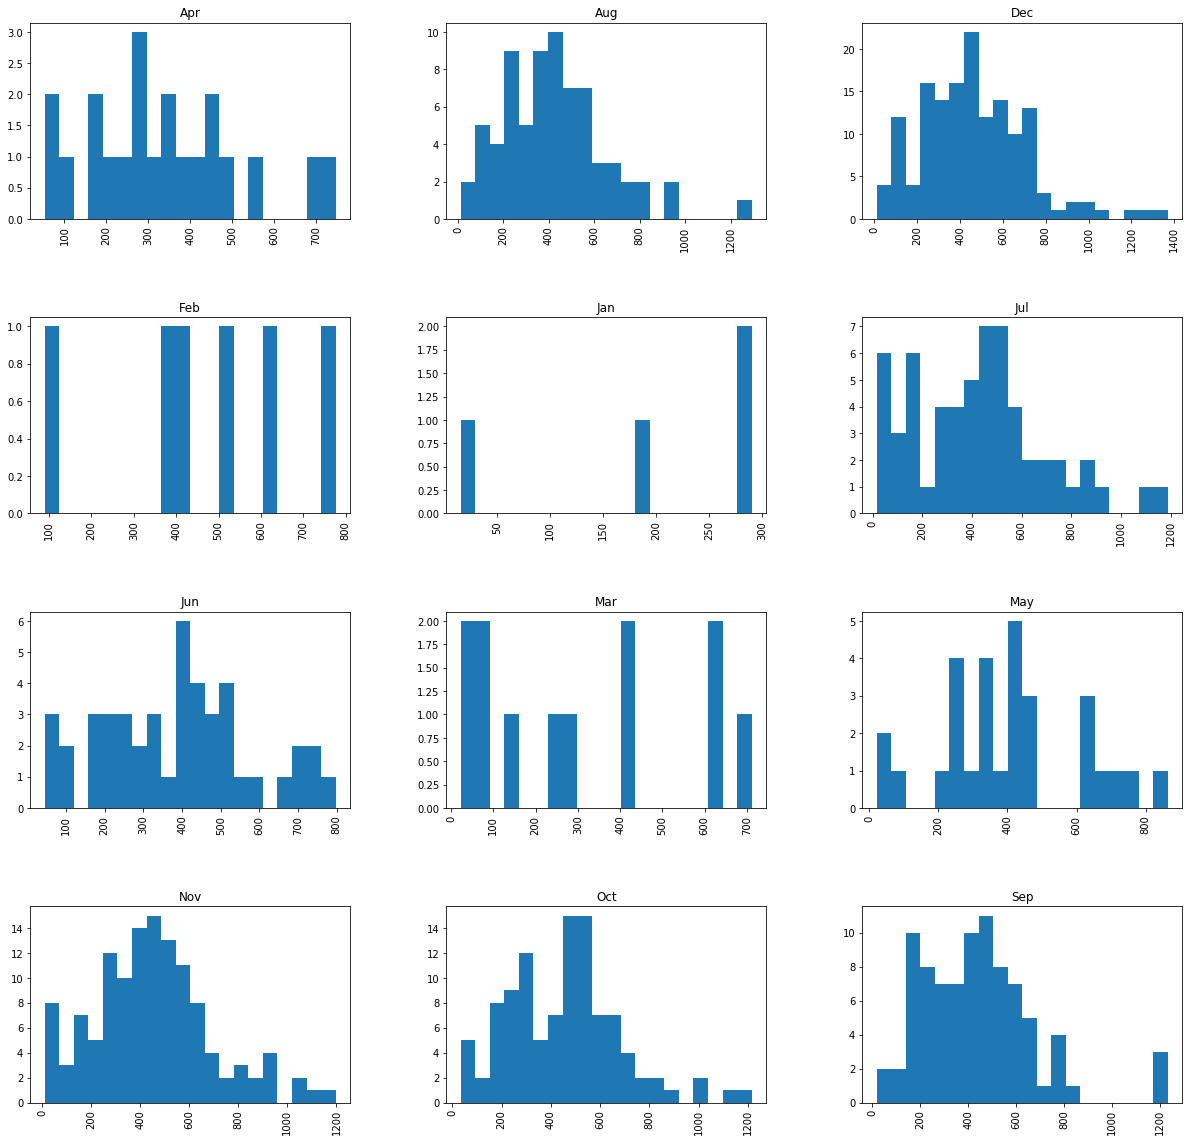

In [105]:
ultimate.hist(column='total_call_time', by='month', bins=20, figsize=(20,20))

# Notes

The first thing I looked at here was a simple pivot table to view key metrics for both the surf and ultimate plan types. Exploring yearly data first, I could see that those on surf plan used messages, data, and calls near the same rate as those on the ultimate plan. For our purposes, this means the surf plan could be more profitable. With just this yearly data, we also see all the data tends to skew right. This tells us that it's the minority of the customers who make up most of the profit, which seems to follow conventional business wisdom. 

To further understand these customers that do spend more, it would be prudent to further study their behavior.

Next, I created a pivot table of the monthly data for both surf and ultimate. This provides a more granular look at the data. From there, I looked closer at the data points and created some histograms to get a better visualization. At this more granual level, it appears there is more similiarity than not between the different plans. In other words, even if someone is a more "average" user, they would tend to spend more on the surf plan as they send at similar levels to the ultimate plan.

# Part 4. Hypothesis Testing

In [106]:
pivot.drop('tariff', axis=1, inplace=True)

In [107]:
pivot = pivot.merge(users, on='user_id')

In [108]:
pivot.head()

,total_revenue,avg_revenue_per_month,first_name,last_name,age,city,reg_date,tariff,churn_date
user_id,,,,,,,,,
1000,70.000000,5.833333,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1001,238.742344,19.895195,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
1002,99.101562,8.258464,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
1003,152.465703,12.705475,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
1004,582.558594,48.546549,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


In [109]:
surf_df = pivot[pivot['tariff'] == 'surf']

In [110]:
surf_df

,total_revenue,avg_revenue_per_month,first_name,last_name,age,city,reg_date,tariff,churn_date
user_id,,,,,,,,,
1001,238.742344,19.895195,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
1002,99.101562,8.258464,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
1003,152.465703,12.705475,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
1004,582.558594,48.546549,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
1005,37.617188,3.134766,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
...,...,...,...,...,...,...,...,...,...
1494,173.242188,14.436849,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaT
1495,450.194531,37.516211,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
1496,121.015625,10.084635,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT


In [111]:
ultimate_df = pivot[pivot['tariff'] == 'ultimate']

In [112]:
monthly_revenue_surf = surf_df['avg_revenue_per_month'].tolist()
monthly_revenue_ultimate = ultimate_df['avg_revenue_per_month'].tolist()

In [113]:
results = st.ttest_ind(monthly_revenue_surf, monthly_revenue_ultimate)

In [114]:
results

Ttest_indResult(statistic=-2.39744493536189, pvalue=0.016877222311760032)

In [115]:
def by_state(row):
    if 'NY' in row['city'] or 'NJ' in row['city']:
        return 'NY/NJ'
    else: 
        return 'Other'

In [116]:
pivot['state'] = pivot.apply(by_state, axis=1)

In [117]:
pivot.head()

,total_revenue,avg_revenue_per_month,first_name,last_name,age,city,reg_date,tariff,churn_date,state
user_id,,,,,,,,,,
1000,70.000000,5.833333,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Other
1001,238.742344,19.895195,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,Other
1002,99.101562,8.258464,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,Other
1003,152.465703,12.705475,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,Other
1004,582.558594,48.546549,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,Other


In [118]:
ny_df = pivot[pivot['state'] == 'NY/NJ']

In [119]:
other_df = pivot[pivot['state'] == 'Other']

In [120]:
monthly_revenue_ny = ny_df['avg_revenue_per_month'].tolist()
monthly_revenue_other = other_df['avg_revenue_per_month'].tolist()

In [121]:
results2 = st.ttest_ind(monthly_revenue_ny, monthly_revenue_other)

In [122]:
results2

Ttest_indResult(statistic=-0.3571583189703668, pvalue=0.721124584720332)

We wanted to test two main hypotheses in this section. First, whether there was a clear different between surf and ultimate average monthly income. This can be achieved by presenting a null hypothesis: there is no difference between the two. Or, the alternative: there is a difference. With a simple t-test, we find that our pvalue is 0.013, which is within a 5% confidence threshold. Knowing this, and adding in our observed data visualizations, it seems reasonable to reject the null hypothesis in favor of the alternative. This warrants further exploration to see if we can figure out who the "ideal" customers would be and how to ensure we sign up more of them on the surf plan. 

The second hypothesis is whether or not people in NY/NJ might skew the data. Said more accurately, do we note a significantly higher revenue from these cities. To do this, we split the data by location so that NY/NJ was in one group and the rest in the other. We performed another 2-sided t-test. The null hypothesis in this case is that there is no difference between these states and the others. The alternative is that there is a significant difference. In this case, we cannot reject the null hypothesis because our pvalue is very high -showing that there is a good chance of getting a similar mean in and otherside the NY/NJ area. 

# Part 5. Overall Conclusions

Overall, I would recommend the company promote the surf plan more often than not. To get the absolute best profits, I would further recommend digging into users on the surf plan who are hitting these higher monthly average to better learn about their situations. This might help target marketing efforts to reach more high-paying customers. 